<a href="https://colab.research.google.com/github/armand010/PembMesin_Ganjil_2024/blob/main/kuis1ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

# Preparation

In [1]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


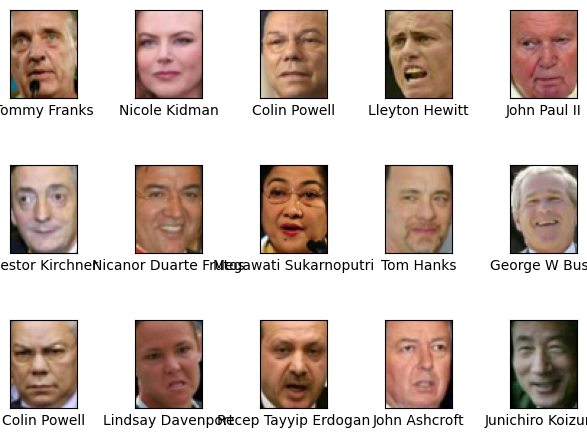

In [8]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocecing


Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,
    
1. Standardisasi nilai fitur ataupun label
2. Penyesuaian ukuran gambar
3. Perubahan colorspace gambar
4. dsb


In [10]:
# Preprocessing
from sklearn.preprocessing import StandardScaler
from skimage.color import rgb2gray
import cv2

# Resize all images to a smaller dimension for faster processing
def resize_images(images, size=(100, 100)):
    resized_images = [cv2.resize(img, size) for img in images]
    return np.array(resized_images)

# Resize the images to 100x100 pixels
faces_resized = resize_images(faces.images)

# Histogram Calculation Function
def calculate_histograms(images):
    histograms = []
    for img in images:
        # Calculate histogram for each channel (RGB)
        hist_r = cv2.calcHist([img], [0], None, [256], [0, 256])  # Red channel
        hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])  # Green channel
        hist_b = cv2.calcHist([img], [2], None, [256], [0, 256])  # Blue channel
        # Flatten histograms and concatenate
        histograms.append(np.concatenate([hist_r.flatten(), hist_g.flatten(), hist_b.flatten()]))
    return np.array(histograms)

# Get histograms for each image
histograms = calculate_histograms(faces_resized)

# Standardize the histogram data
scaler = StandardScaler()
X = scaler.fit_transform(histograms)

# Labels (y)
y = faces.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


# Features Extraction

Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

Hints:

Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
Anda dapat menggunakan fungsi np.histrogram dari library numpy

# Build Model

Pada bagian ini lakukan proses pembuatan model,

1. Pembuatan data training dan data testing
2. Pembuatan objek model
3. Proses fitting model

# Evaluation

Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
dengan menggunakan metric akurasi dan juga classfication report

Hints:
Anda dapat menggunakan referensi Jobseet 4 Percobaan 5